In [1]:


import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns


In [2]:
iris = pd.read_csv('../Datasets/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [123]:

iris = iris.drop('Id',axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [124]:
## lets just take two columns for pruning
iris = iris.drop(['PetalLengthCm','PetalWidthCm'],axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


In [125]:
X = iris.drop('Species',axis=1)
y = iris.Species

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)


In [127]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(random_state=2)   
model_tree.fit(X_train,y_train)
y_pred_tree = model_tree.predict(X_train)
y_pred_test = model_tree.predict(X_test)


In [128]:
print(model_tree.get_depth())


13


In [129]:
print(accuracy_score(y_train,y_pred_tree))
print(accuracy_score(y_test,y_pred_test))


0.9333333333333333
0.6666666666666666


In [130]:
path = model_tree.cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00208333, 0.00277778, 0.00277778, 0.00277778,
       0.00369544, 0.00444444, 0.00512821, 0.00554113, 0.00568182,
       0.00614583, 0.00645586, 0.00694444, 0.00745921, 0.00807292,
       0.01049809, 0.01311303, 0.01368141, 0.05849142, 0.0677723 ,
       0.07337398, 0.18894095])

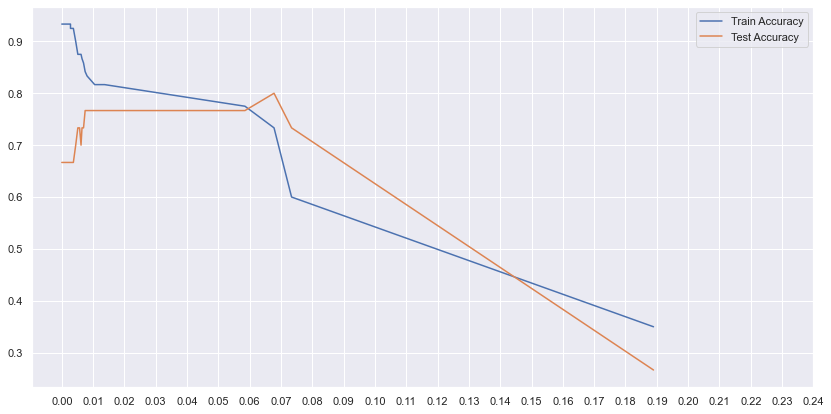

In [131]:
accuracy_train=[]
accuracy_test=[]

for i in alphas:
    model_tree = DecisionTreeClassifier(ccp_alpha=i)
    model_tree.fit(X_train,y_train)
    y_pred_tree = model_tree.predict(X_train)
    y_pred_test = model_tree.predict(X_test)

    accuracy_train.append(accuracy_score(y_train,y_pred_tree))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))


sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [141]:
## for alpha between 0.04 to 0.05: max accuracy is there

model_tree = DecisionTreeClassifier(random_state=2,ccp_alpha=0.045)   
model_tree.fit(X_train,y_train)
y_pred_tree = model_tree.predict(X_train)
y_pred_test = model_tree.predict(X_test)

print(accuracy_score(y_train,y_pred_tree))
print(accuracy_score(y_test,y_pred_test))

0.8166666666666667
0.7666666666666667
